In [1]:
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [2]:
!pip install -q ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# # metadata
# print(statlog_german_credit_data.metadata)

# # variable information
# print(statlog_german_credit_data.variables)

In [4]:
X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [5]:
le = [
    'Attribute1',
    'Attribute3',
    'Attribute4',
    'Attribute6',
    'Attribute7',
    'Attribute9',
    'Attribute10',
    'Attribute12',
    'Attribute14',
    'Attribute15',
    'Attribute17',
    'Attribute19',
    'Attribute20',
]

In [6]:
label_enc = LabelEncoder()
label_enc.fit(X[le].to_numpy().flatten())

for col in le:
    X.loc[:, (col)] = label_enc.transform(X[col])


In [7]:
X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,3,6,29,34,1169,44,49,4,52,0,4,5,67,13,15,2,19,1,22,23
1,4,48,27,34,5951,40,47,2,51,0,2,5,22,13,15,1,19,1,21,23
2,10,12,29,37,2096,40,48,2,52,0,3,5,49,13,15,1,18,2,21,23
3,3,42,27,33,7882,40,48,2,52,2,4,6,45,13,16,1,19,2,21,23
4,3,24,28,30,4870,40,47,3,52,0,4,8,53,13,16,2,19,2,21,23


In [8]:
norm = StandardScaler()
norm.fit(X)
df = norm.transform(X)

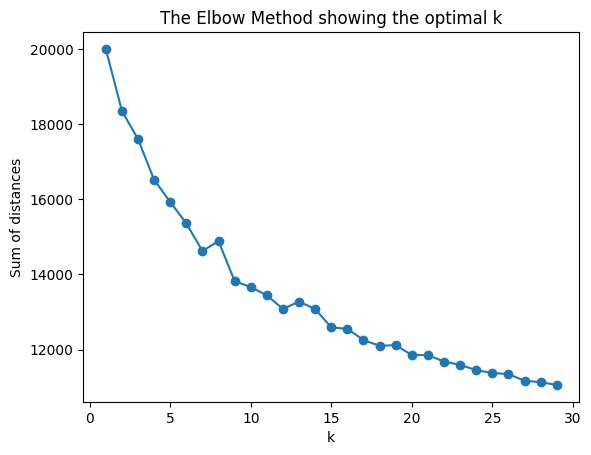

In [9]:
K = range(1, 30)
models = [KMeans(n_clusters=k).fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [10]:
model = KMeans(n_clusters=2)
model.fit(df)
X['cluster'] = model.labels_
X.groupby('cluster').mean()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
cluster,,,,,,,,,,,,,,,,,,,,
0,6.00354,15.702655,27.451327,33.315044,2081.060177,40.833628,47.115044,2.886726,51.658407,0.2,2.607080,5.895575,33.095575,12.688496,14.771681,1.346903,18.640708,1.136283,21.176991,23.061947
1,6.926437,27.657471,27.666667,33.227586,4817.147126,41.457471,47.733333,3.085057,51.712644,0.073563,3.154023,6.958621,38.728736,12.657471,15.133333,1.485057,19.245977,1.179310,21.698851,23.004598


In [19]:
X['cluster'] = X['cluster']+1
X['cluster'].value_counts()

,count
cluster,
1,565
2,435


In [14]:
y['class'].value_counts()

,count
class,
1,700
2,300


In [20]:
accuracy_score(y, X['cluster'])

0.539